# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


<Figure size 720x576 with 0 Axes>

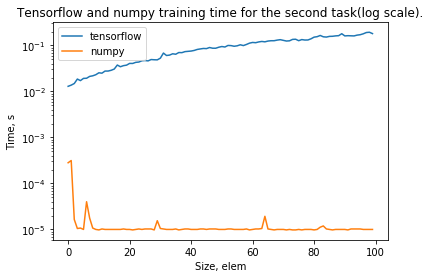

In [ ]:
import time
size=100
t1=np.zeros(size)
t2=np.zeros(size)
sess = tf.Session()
for n in range(size):
    x = tf.random_normal((n,1), dtype="float32")
    y = tf.random_normal((n,1), dtype="float32")
    d = tf.acos(tf.tensordot(tf.transpose(x),y,1)/(tf.linalg.norm(x)*tf.linalg.norm(y)))
    begin = time.time()
    sess.run(d)
    end = time.time()
    time_spent = end - begin
    t1[n]=time_spent
sess.close()
for n in range(size):
    x=np.random.randn(n) 
    y=np.random.randn(n)
    begin = time.time()
    d=np.arccos(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
    end = time.time()
    time_spent = end - begin
    t2[n]=time_spent
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
plt.title('Tensorflow and numpy training time for the second task(log scale).')
plt.xlabel("Size, elem")
plt.ylabel("Time, s")
ax.plot(range(size), t1, label="tensorflow")
ax.plot(range(size), t2, label="numpy")
ax.set_yscale('log')
plt.legend()
plt.show()
    

<Figure size 720x576 with 0 Axes>

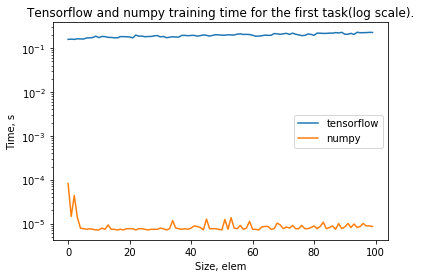

In [ ]:
size=100
t1=np.zeros(size)
t2=np.zeros(size)
sess = tf.Session()
for n in range(size):
    a = tf.random_normal((n,n), dtype="float32")
    a2 = tf.reduce_sum(tf.square(tf.diag_part(a)))
    begin = time.time()
    sess.run(a2)
    end = time.time()
    time_spent = end - begin
    t1[n]=time_spent
sess.close()
for n in range(size):
    a=np.random.randn(n,n)
    begin = time.time()
    a2 = np.sum(np.square(np.diag(a)))
    end = time.time()   
    time_spent = end - begin
    t2[n]=time_spent
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
plt.xlabel("Size, elem")
plt.ylabel("Time, s")
plt.title('Tensorflow and numpy training time for the first task(log scale).')
ax.plot(range(size), t1, label="tensorflow")
ax.plot(range(size), t2, label="numpy")
ax.set_yscale('log')
plt.legend()
plt.show()
    

<Figure size 720x576 with 0 Axes>

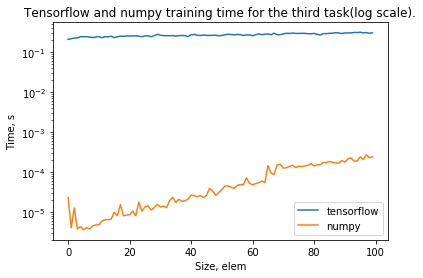

In [ ]:
size=100
t1=np.zeros(size)
t2=np.zeros(size)
sess = tf.Session()
for n in range(size):
    a = tf.random_normal((n,n), dtype="float32")
    b = tf.random_normal((n,n), dtype="float32")
    c = tf.matmul(a, b)-tf.matmul(b, a)
    begin = time.time()
    sess.run(c)
    end = time.time()
    time_spent = end - begin
    t1[n] = time_spent
sess.close()
for n in range(size):
    a = np.random.randn(n,n)
    b = np.random.randn(n,n) 
    begin = time.time()
    c = np.dot(a, b)-np.dot(b, a)
    end = time.time()
    
    time_spent = end - begin
    t2[n] = time_spent
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
plt.xlabel("Size, elem")
plt.ylabel("Time, s")
plt.title('Tensorflow and numpy training time for the third task(log scale).')
ax.plot(range(size), t1, label="tensorflow")
ax.plot(range(size), t2, label="numpy")
ax.set_yscale('log')
plt.legend()
plt.show()

NumPy работает быстрее TensorFlow, так как они создавались для разных задач и TensorFlow имеет более сложную структуру для решения более сложных задач.

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [ ]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [ ]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [ ]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

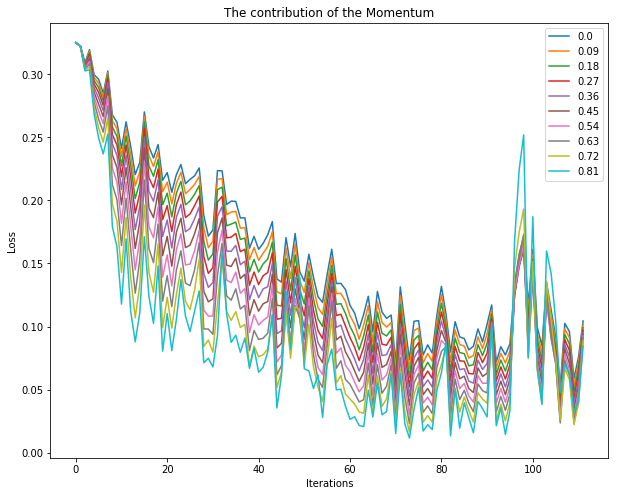

In [ ]:
# YOUR CODE !
plt.figure(figsize=(10,8))
for i in range(10):
    train_op = tf.train.MomentumOptimizer(0.01, i*9/100).minimize(loss)
    loss_history = train(X, y, train_op)
    plt.plot(range(len(X)//16), loss_history, label=str(i*9/100))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('The contribution of the Momentum')
plt.legend()
plt.show()


Ваш ответ: сходимость лучше при 0,45 - 0,54

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

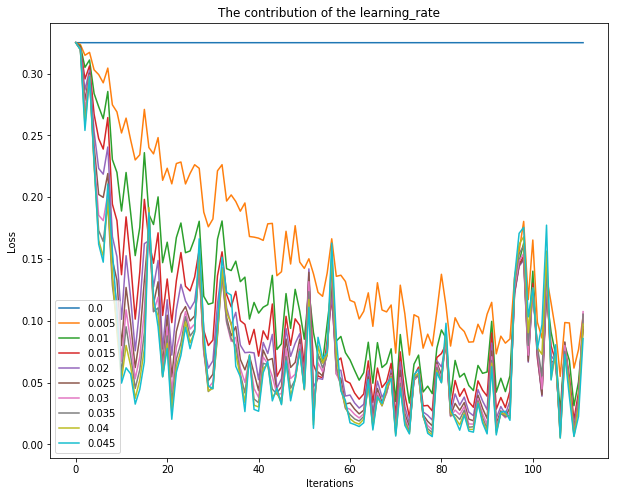

In [ ]:
# YOUR CODE !
plt.figure(figsize=(10,8))
for i in range(10):
    train_op = tf.train.MomentumOptimizer(i*5/1000, 0.5).minimize(loss)
    loss_history = train(X, y, train_op)
    plt.plot(range(len(X)//16), loss_history, label=str(i*5/1000))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('The contribution of the learning_rate')
plt.legend()
plt.show()

Ваш ответ: при learning_rate 0.01 - 0.02

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

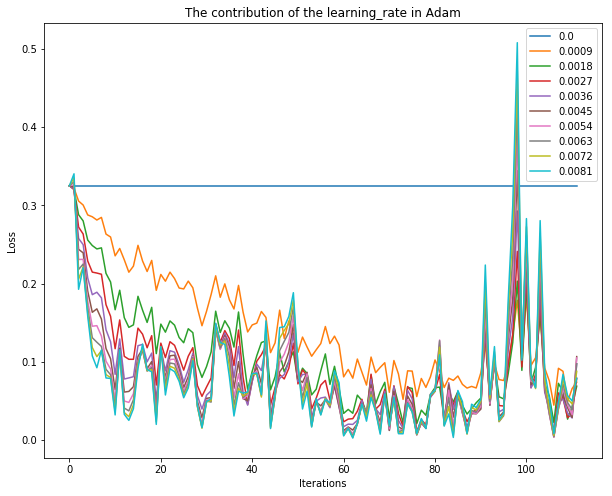

In [ ]:
# YOUR CODE !
plt.figure(figsize=(10,8))
for i in range(10):
    train_op = tf.train.AdamOptimizer(i*9/10000).minimize(loss)
    loss_history = train(X, y, train_op)
    plt.plot(range(len(X)//16), loss_history, label=str(i*9/10000))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('The contribution of the learning_rate in Adam')
plt.legend()
plt.show()

Ваш ответ: Adam c learning_rate 0,0018-0,0027 сходится быстрее

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

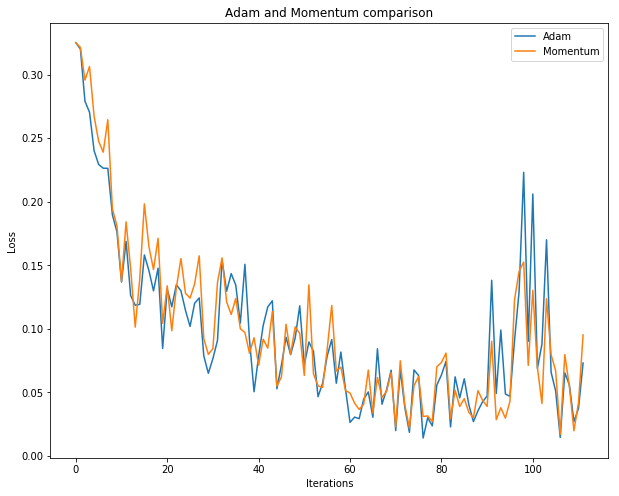

In [ ]:
# YOUR CODE !
plt.figure(figsize=(10,8))
train_op1 = tf.train.AdamOptimizer(0.0023).minimize(loss)
loss_history1 = train(X, y, train_op1)
plt.plot(range(len(X)//16), loss_history1, label="Adam")
train_op2 = tf.train.MomentumOptimizer(0.015, 0.5).minimize(loss)
loss_history2 = train(X, y, train_op2)
plt.plot(range(len(X)//16), loss_history2, label="Momentum")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Adam and Momentum comparison')
plt.legend()
plt.show()

Ваш ответ: в среднем тенденция одинаковая, но у моментум слегка плавнее под конец сходится 

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [ ]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

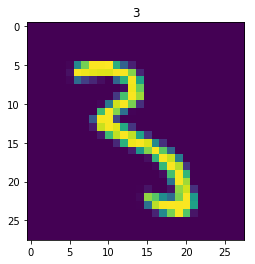

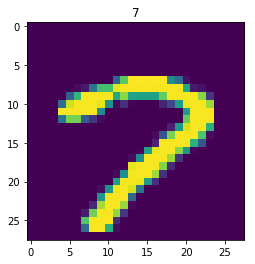

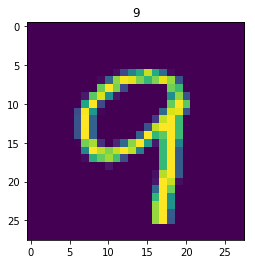

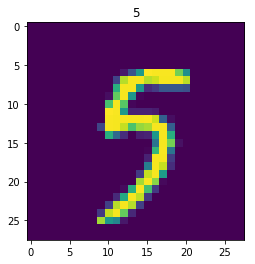

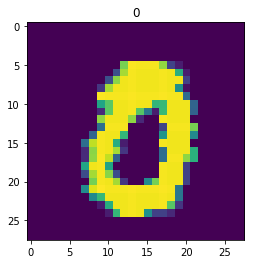

In [ ]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [ ]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(5):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test
  
X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]
 
layer1 = tf.layers.dense(X_input ,512, activation=tf.nn.relu)
layer2 = tf.layers.dense(layer1 ,128, activation=tf.nn.relu)


#<define architecture as a function of X_input>
logits = tf.layers.dense(layer2, 10)
predicted =tf.nn.softmax(logits)
#<define 10-class outputs>

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf.one_hot(y_input, depth=10)))
#<define log loss with one-hot vector of labels
train_op = tf.train.MomentumOptimizer(0.015, 0.5).minimize(loss)
#<define train operation here>

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)


Test accuracy:  0.9754
Test accuracy:  0.9754
Test accuracy:  0.9754
Test accuracy:  0.9754
Test accuracy:  0.9754


Можно усложнить модель для увеличения точности, но выше 0.963 все равно не получается. Пришлось увеличивать количество эпох. Для оптимации обучения мы используем ограниченый датасет и с помощью градиентного спуска строим "кривую" (подбираем веса). Поэтому необходимо запустить обучение несколько раз, так веса нейронной сети приближаются к необходимым. 
Если эпох слишком много возможно переобучение.